In [1]:
import tensorflow as tf 
from tensorflow import keras 
import numpy as np 

In [2]:
from IPython.display import Image

In [3]:
from tensorflow. keras.datasets import fashion_mnist

(x_train_set, y_train_set), (x_test, y_test) = fashion_mnist.load_data()

from sklearn.model_selection import train_test_split 

x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_set, y_train_set, random_state=1)

x_train = x_train / 255.0
x_valid = x_valid / 255.0 
x_test = x_test  / 255.0

In [4]:
#不用執行，只是預先確認分割的資料結果
print(y_train[:10])# 全部
ind_B = (y_train == 4) | (y_train == 5) #篩選出原分類：4涼鞋，5外套  
print(ind_B[:10])
#找出ind_B=True,且y_train=5的轉成 1.0
#若y_train=4則會變成 0.0
y_B = (y_train[ind_B] == 5).astype(np.float32)
print(y_B[:10])
y_A = y_train[~ind_B] #排除 ind_B，即找出ind_B=False
print(y_A[:10])
y_A[y_A > 5] -= 2 #將原分類結果 > 5的，改成-2
print(y_A[:10])

[0 9 8 2 2 5 1 4 1 1]
[False False False False False  True False  True False False]
[1. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
[0 9 8 2 2 1 1 1 8 9]
[0 7 6 2 2 1 1 1 6 7]


In [5]:
#將 data拆成 2部分
def split_data(x, y) :
    ind_B = (y == 4) | (y == 5) #----->篩選原分類：4涼鞋，5外套 
    y_B = (y[ind_B] == 5).astype(np.float32)#----->原分類 5 轉成 1；分類 4轉成 0
    y_A = y[~ind_B] #----->排除 ind_B
    y_A[y_A > 5] -= 2 #---->原分類編號>5的，-2
    return (x[~ind_B], y_A), (x[ind_B], y_B)



(x_train_A, y_train_A), (x_train_B, y_train_B) = split_data(x_train, y_train) 
(x_valid_A, y_valid_A), (x_valid_B, y_valid_B) = split_data(x_valid, y_valid)
(x_test_A, y_test_A), (x_test_B, y_test_B) = split_data(x_test, y_test)#-----> x_train_A:非涼鞋外套 ; # x_train_B:涼鞋外套

x_train_B, y_train_B = x_train_B[:100], y_train_B[:100]

In [6]:
x_train_A.shape, y_train_A[: 10]

((35968, 28, 28), array([0, 7, 6, 2, 2, 1, 1, 1, 6, 7], dtype=uint8))

In [7]:
x_train_B.shape, y_train_B[:10]

((100, 28, 28), array([1., 0., 0., 0., 1., 1., 1., 0., 0., 0.], dtype=float32))

In [24]:
keras.backend.clear_session()
np. random. seed (1)
tf.random.set_seed(1)

### Model A

In [11]:
model_A = keras.models.Sequential ()
#layer 0
model_A.add(keras.layers.Flatten(input_shape= [28, 28])) 
#layer 1-4
for hidden_i in (200, 150, 100, 50):
    model_A.add(keras.layers.Dense(hidden_i, activation='relu'))
#layer5:輸出 8 類
model_A.add(keras.layers.Dense(8, activation='softmax' ))

In [12]:
model_A.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 200)               157000    
                                                                 
 dense_6 (Dense)             (None, 150)               30150     
                                                                 
 dense_7 (Dense)             (None, 100)               15100     
                                                                 
 dense_8 (Dense)             (None, 50)                5050      
                                                                 
 dense_9 (Dense)             (None, 8)                 408       
                                                                 
Total params: 207708 (811.36 KB)
Trainable params: 207

In [13]:
model_A. compile (loss='sparse_categorical_crossentropy',
                  optimizer=keras.optimizers.SGD (learning_rate=1e-3), 
                  metrics=['accuracy'])

In [14]:
train = model_A. fit(x_train_A, y_train_A, epochs=20,
                    validation_data=(x_valid_A, y_valid_A))

Epoch 1/20
1124/1124 [==============================] - 4s 2ms/step - loss: 1.6937 - accuracy: 0.5883 - val_loss: 1.1665 - val_accuracy: 0.7718
Epoch 2/20
1124/1124 [==============================] - 2s 2ms/step - loss: 0.8344 - accuracy: 0.7863 - val_loss: 0.6499 - val_accuracy: 0.7958
Epoch 3/20
1124/1124 [==============================] - 2s 2ms/step - loss: 0.5931 - accuracy: 0.8066 - val_loss: 0.5508 - val_accuracy: 0.8127
Epoch 4/20
1124/1124 [==============================] - 2s 2ms/step - loss: 0.5273 - accuracy: 0.8183 - val_loss: 0.5060 - val_accuracy: 0.8226
Epoch 5/20
1124/1124 [==============================] - 2s 2ms/step - loss: 0.4928 - accuracy: 0.8290 - val_loss: 0.4850 - val_accuracy: 0.8240
Epoch 6/20
1124/1124 [==============================] - 2s 2ms/step - loss: 0.4692 - accuracy: 0.8357 - val_loss: 0.4594 - val_accuracy: 0.8372
Epoch 7/20
1124/1124 [==============================] - 3s 2ms/step - loss: 0.4513 - accuracy: 0.8421 - val_loss: 0.4465 - val_accuracy:

In [16]:
model_A.evaluate(x_test_A, y_test_A)

250/250 [==============================] - 0s 1ms/step - loss: 0.3855 - accuracy: 0.8637


[0.38547268509864807, 0.8637499809265137]

In [17]:
model_A.save ('model_A.h5')

d:\anaconda\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Model B

In [30]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape= [28, 28])) 

for hidden_i in (300, 150, 100, 80):
    model_B.add(keras.layers.Dense(hidden_i, activation='relu')) 
    
model_B.add(keras.layers.Dense(1, activation='sigmoid'))

In [31]:
model_B.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 300)               235500    
                                                                 
 dense_6 (Dense)             (None, 150)               45150     
                                                                 
 dense_7 (Dense)             (None, 100)               15100     
                                                                 
 dense_8 (Dense)             (None, 80)                8080      
                                                                 
 dense_9 (Dense)             (None, 1)                 81        
                                                                 
Total params: 303,911
Trainable params: 303,911
Non-tr

In [32]:
model_B.compile(loss='binary_crossentropy',
                optimizer=keras.optimizers.SGD(learning_rate=1e-3), 
                metrics=['accuracy'])

In [33]:
train = model_B.fit(x_train_B, y_train_B, epochs=20,
                    validation_data=(x_valid_B, y_valid_B))

Epoch 1/20
4/4 [==============================] - 1s 87ms/step - loss: 0.7220 - accuracy: 0.4500 - val_loss: 0.7169 - val_accuracy: 0.4737
Epoch 2/20
4/4 [==============================] - 0s 36ms/step - loss: 0.7150 - accuracy: 0.4500 - val_loss: 0.7101 - val_accuracy: 0.4788
Epoch 3/20
4/4 [==============================] - 0s 35ms/step - loss: 0.7080 - accuracy: 0.4500 - val_loss: 0.7012 - val_accuracy: 0.4939
Epoch 4/20
4/4 [==============================] - 0s 35ms/step - loss: 0.6989 - accuracy: 0.4500 - val_loss: 0.6921 - val_accuracy: 0.5290
Epoch 5/20
4/4 [==============================] - 0s 35ms/step - loss: 0.6900 - accuracy: 0.4800 - val_loss: 0.6862 - val_accuracy: 0.5617
Epoch 6/20
4/4 [==============================] - 0s 34ms/step - loss: 0.6835 - accuracy: 0.5400 - val_loss: 0.6802 - val_accuracy: 0.5920
Epoch 7/20
4/4 [==============================] - 0s 35ms/step - loss: 0.6775 - accuracy: 0.6000 - val_loss: 0.6735 - val_accuracy: 0.6375
Epoch 8/20
4/4 [===========

In [34]:
model_B.evaluate(x_test_B, y_test_B)

63/63 [==============================] - 0s 1ms/step - loss: 0.6047 - accuracy: 0.8950


[0.6046993732452393, 0.8949999809265137]

# (特徵提取器)

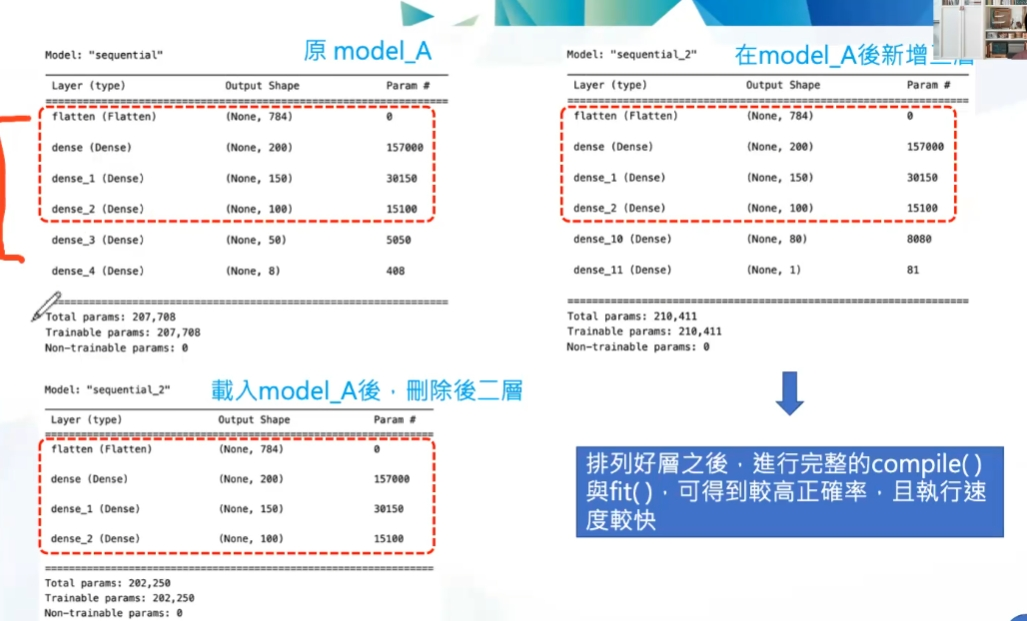

In [39]:
Image("img/model.jpg", width=1000)

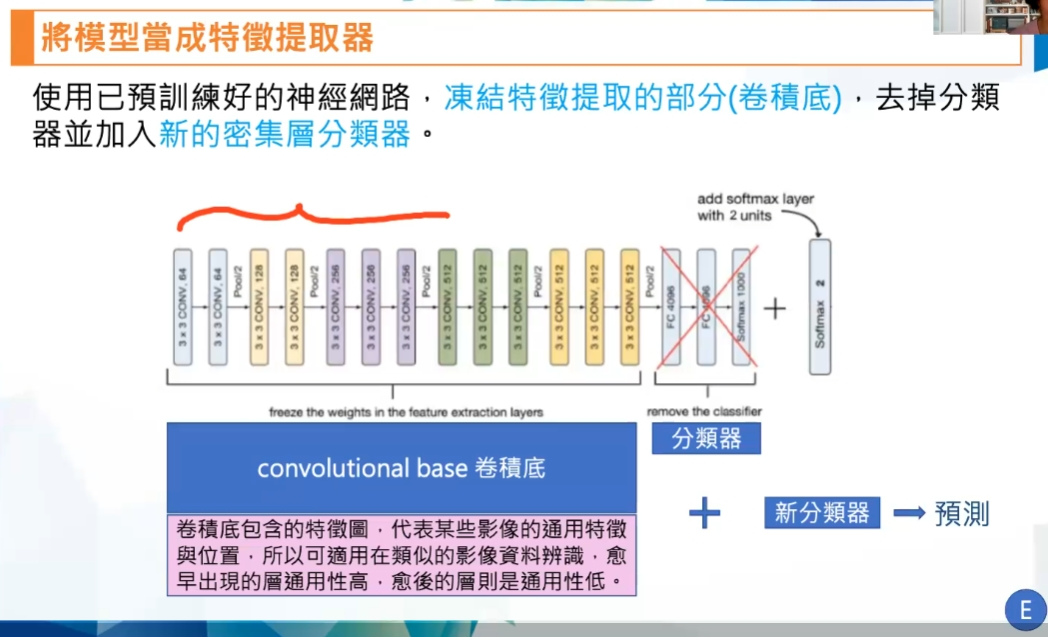

In [40]:
Image("img/m1.jpg", width=1000)

### Step1:載入模型

In [25]:
# Model_tr (Transfer Learning) 
model_A = keras.models.load_model('model_A.h5')

In [26]:
model_A.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 200)               157000    
                                                                 
 dense_6 (Dense)             (None, 150)               30150     
                                                                 
 dense_7 (Dense)             (None, 100)               15100     
                                                                 
 dense_8 (Dense)             (None, 50)                5050      
                                                                 
 dense_9 (Dense)             (None, 8)                 408       
                                                                 
Total params: 207708 (811.36 KB)
Trainable params: 207

### Step2.Reuse lower Layers

In [20]:
# flatten (Flatten) / dense (Dense) / dense_1 (Dense) / dense_2 (Dense)
model_tr = keras.models.Sequential(model_A.layers[:-2])#不含後二層


In [21]:
model_tr.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 200)               157000    
                                                                 
 dense_6 (Dense)             (None, 150)               30150     
                                                                 
 dense_7 (Dense)             (None, 100)               15100     
                                                                 
Total params: 202250 (790.04 KB)
Trainable params: 202250 (790.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Step3. replace upper Layers

In [22]:
model_tr.add(keras.layers.Dense(80, activation='relu')) 
model_tr.add(keras.layers.Dense(1, activation='sigmoid'))

In [23]:
model_tr.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 200)               157000    
                                                                 
 dense_6 (Dense)             (None, 150)               30150     
                                                                 
 dense_7 (Dense)             (None, 100)               15100     
                                                                 
 dense_10 (Dense)            (None, 80)                8080      
                                                                 
 dense_11 (Dense)            (None, 1)                 81        
                                                                 
Total params: 210411 (821.92 KB)
Trainable params: 210

### Step4 : Train in few epochs--->初期訓練

In [27]:
for layer in model_tr.layers[:-2]:
    layer.trainable = False #鎖定不做訓練

In [28]:
model_tr.summary(show_trainable=True)

Model: "sequential_2"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 flatten_1 (Flatten)         (None, 784)               0         N          
                                                                            
 dense_5 (Dense)             (None, 200)               157000    N          
                                                                            
 dense_6 (Dense)             (None, 150)               30150     N          
                                                                            
 dense_7 (Dense)             (None, 100)               15100     N          
                                                                            
 dense_10 (Dense)            (None, 80)                8080      Y          
                                                                            
 dense_11 (Dense)            (None, 1)                

In [29]:
model_tr.compile(loss='binary_crossentropy',
                 optimizer=keras.optimizers.SGD(learning_rate=1e-3), 
                 metrics= ['accuracy'])

In [31]:
train = model_tr.fit(x_train_B, y_train_B, epochs=10,
                      validation_data=(x_valid_B, y_valid_B))

Epoch 1/10
4/4 [==============================] - 0s 68ms/step - loss: 0.4769 - accuracy: 0.5900 - val_loss: 0.4792 - val_accuracy: 0.6334
Epoch 2/10
4/4 [==============================] - 0s 40ms/step - loss: 0.4622 - accuracy: 0.6300 - val_loss: 0.4671 - val_accuracy: 0.7005
Epoch 3/10
4/4 [==============================] - 0s 42ms/step - loss: 0.4504 - accuracy: 0.6900 - val_loss: 0.4569 - val_accuracy: 0.7497
Epoch 4/10
4/4 [==============================] - 0s 45ms/step - loss: 0.4399 - accuracy: 0.7300 - val_loss: 0.4482 - val_accuracy: 0.7702
Epoch 5/10
4/4 [==============================] - 0s 46ms/step - loss: 0.4319 - accuracy: 0.7500 - val_loss: 0.4381 - val_accuracy: 0.8053
Epoch 6/10
4/4 [==============================] - 0s 44ms/step - loss: 0.4208 - accuracy: 0.8500 - val_loss: 0.4278 - val_accuracy: 0.8538
Epoch 7/10
4/4 [==============================] - 0s 46ms/step - loss: 0.4108 - accuracy: 0.9200 - val_loss: 0.4188 - val_accuracy: 0.8753
Epoch 8/10
4/4 [===========

### Step5 : Continue Training后期訓練(全部參數都要參與訓練)

In [32]:
for layer in model_tr.layers [:-2]:
    layer.trainable=True #將鎖定的層打開，參與訓練

In [33]:
model_tr.summary(show_trainable=True)

Model: "sequential_2"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 flatten_1 (Flatten)         (None, 784)               0         Y          
                                                                            
 dense_5 (Dense)             (None, 200)               157000    Y          
                                                                            
 dense_6 (Dense)             (None, 150)               30150     Y          
                                                                            
 dense_7 (Dense)             (None, 100)               15100     Y          
                                                                            
 dense_10 (Dense)            (None, 80)                8080      Y          
                                                                            
 dense_11 (Dense)            (None, 1)                

In [34]:
model_tr.compile(loss='binary_crossentropy',
                 optimizer=keras.optimizers.SGD(learning_rate=1e-3), 
                 metrics= ['accuracy'])

In [35]:
train = model_tr.fit(x_train_B, y_train_B, epochs=16,
                      validation_data=(x_valid_B, y_valid_B))

Epoch 1/16
4/4 [==============================] - 1s 82ms/step - loss: 0.3766 - accuracy: 0.9600 - val_loss: 0.3803 - val_accuracy: 0.9491
Epoch 2/16
4/4 [==============================] - 0s 42ms/step - loss: 0.3610 - accuracy: 0.9800 - val_loss: 0.3655 - val_accuracy: 0.9599
Epoch 3/16
4/4 [==============================] - 0s 39ms/step - loss: 0.3463 - accuracy: 0.9800 - val_loss: 0.3525 - val_accuracy: 0.9653
Epoch 4/16
4/4 [==============================] - 0s 40ms/step - loss: 0.3328 - accuracy: 0.9800 - val_loss: 0.3412 - val_accuracy: 0.9666
Epoch 5/16
4/4 [==============================] - 0s 39ms/step - loss: 0.3221 - accuracy: 0.9800 - val_loss: 0.3292 - val_accuracy: 0.9717
Epoch 6/16
4/4 [==============================] - 0s 40ms/step - loss: 0.3091 - accuracy: 0.9800 - val_loss: 0.3176 - val_accuracy: 0.9768
Epoch 7/16
4/4 [==============================] - 0s 40ms/step - loss: 0.2981 - accuracy: 1.0000 - val_loss: 0.3072 - val_accuracy: 0.9798
Epoch 8/16
4/4 [===========

In [36]:
model_tr.evaluate(x_test_B, y_test_B)

63/63 [==============================] - 0s 1ms/step - loss: 0.2367 - accuracy: 0.9920


[0.23671400547027588, 0.9919999837875366]

In [51]:
model_B.evaluate(x_test_B, y_test_B)

 1/63 [..............................] - ETA: 1s - loss: 0.6071 - accuracy: 0.8750

63/63 [==============================] - 0s 1ms/step - loss: 0.6047 - accuracy: 0.8950


[0.6046993732452393, 0.8949999809265137]